<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import function file necessary for running this notebook 
</p>

In [2]:
import fun_CondProb as fn

<span style="font-family: 'Times New Roman'; font-size: 32px; color: red;"> List available FACTS Data:: <br> </span>
<span style="font-size: 22px; color: green;"> :: FACTS 1.0 run</span> 
    

In [3]:
# ssp='ssp585'
# path = f'/projects/kopp/facts-experiments/221217/coupling.{ssp}/output/'
# files=fn.list_files_with_names(path, ["global", "AIS"])
# #
# df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
# print(df.to_string(index=False))

<span style="font-size: 22px; color: green;"> :: FACTS 1.1.1 (Axex run)</span> 
    

In [4]:
ssp='ssp585'
path = f'/projects/kopp/ar2208/factsv1.1.1/coupling.{ssp}/output/'
files=fn.list_files_with_names(path, ["global", "AIS"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
print(df.to_string(index=False))

 Index                                                    File Name
     0     coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc
     1    coupling.ssp585.ar5AIS.ipccar5.icesheets_EAIS_globalsl.nc
     2     coupling.ssp585.ar5AIS.ipccar5.icesheets_GIS_globalsl.nc
     3    coupling.ssp585.ar5AIS.ipccar5.icesheets_WAIS_globalsl.nc
     4  coupling.ssp585.bamber19.bamber19.icesheets_AIS_globalsl.nc
     5 coupling.ssp585.bamber19.bamber19.icesheets_EAIS_globalsl.nc
     6 coupling.ssp585.bamber19.bamber19.icesheets_WAIS_globalsl.nc
     7      coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc
     8     coupling.ssp585.deconto21.deconto21.AIS_EAIS_globalsl.nc
     9     coupling.ssp585.deconto21.deconto21.AIS_WAIS_globalsl.nc
    10       coupling.ssp585.emuAIS.emulandice.AIS_EAIS_globalsl.nc
    11        coupling.ssp585.emuAIS.emulandice.AIS_PEN_globalsl.nc
    12       coupling.ssp585.emuAIS.emulandice.AIS_WAIS_globalsl.nc
    13            coupling.ssp585.emuAIS.emuland

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<p style="font-size: 32px; color: green;">&#10145; Choose <span style="color: blue;">AIS</span> data file.</p>

In [5]:
#
start_year=2020; end_year=2100; unit='cm'; station=0


# AIS from Emulator module.
AIS_emu_path=f'{path}/coupling.ssp585.emuAIS.emulandice.AIS_globalsl.nc'
var = 'emu'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from Larmip module.
AIS_lar_path=f'{path}/coupling.ssp585.larmip.larmip.AIS_globalsl.nc'
var = 'lar'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")


# AIS from the IPCC AR5 module.
AIS_ar5_path=f'{path}/coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc'
var = 'ar5'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the IPCC Deconto_21 module.
AIS_d21_path=f'{path}/coupling.ssp585.deconto21.deconto21.AIS_AIS_globalsl.nc'
var = 'd21'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the Bamber 19 module.
AIS_b19_path=f'{path}/coupling.ssp585.bamber19.bamber19.icesheets_AIS_globalsl.nc'
var = 'b19'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Select Plot data.
</span>
<br>
<span style="font-family: 'Times New Roman'; font-size: 16pt; color: blue;">
    :: Extract all samples from a particulay year 
</span>

In [6]:
def get_axis_data(dum_slc, dum_time, *specific_year):
    return [dum_slc[:, dum_time == t].squeeze() for t in specific_year]

In [7]:
T1=2030; T2=2050; T3=2070; T4=2100

var = 'lar'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'ar5'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'd21'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")
var = 'b19'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3}, {var}_{T4} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3}, {T4})")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Plot::
</span>
<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> Larmip AIS </span>

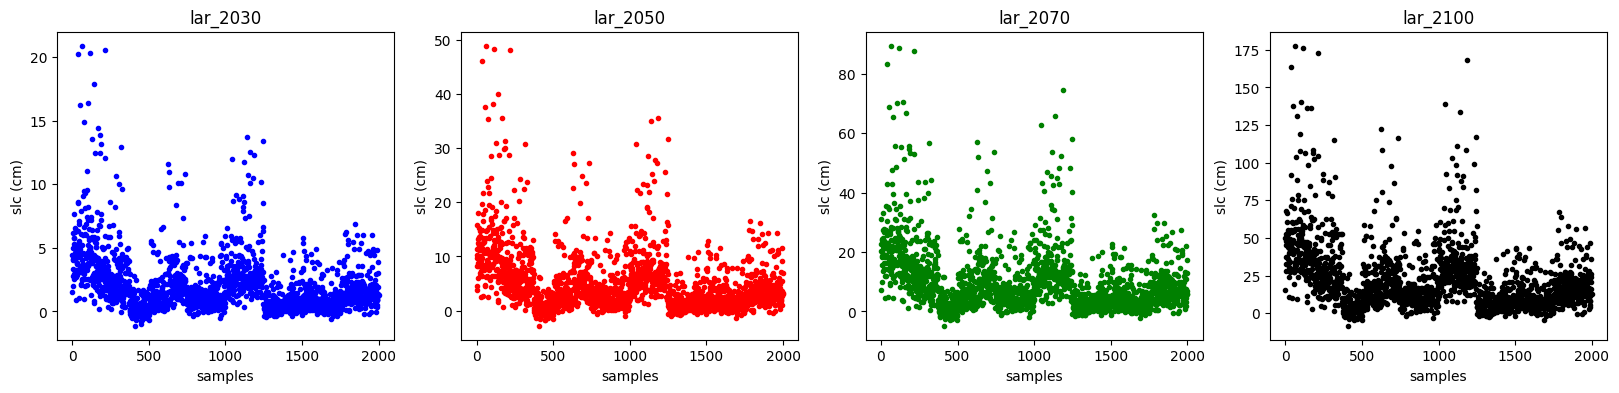

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
var = 'lar'; T1=2030; T2=2050; T3=2070; T4=2100  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');
ax[3].plot(eval(f'{var}_{T4}'), color='k', marker='.', linestyle='none'); ax[3].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T4}');

<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> bamber 19 AIS </span>

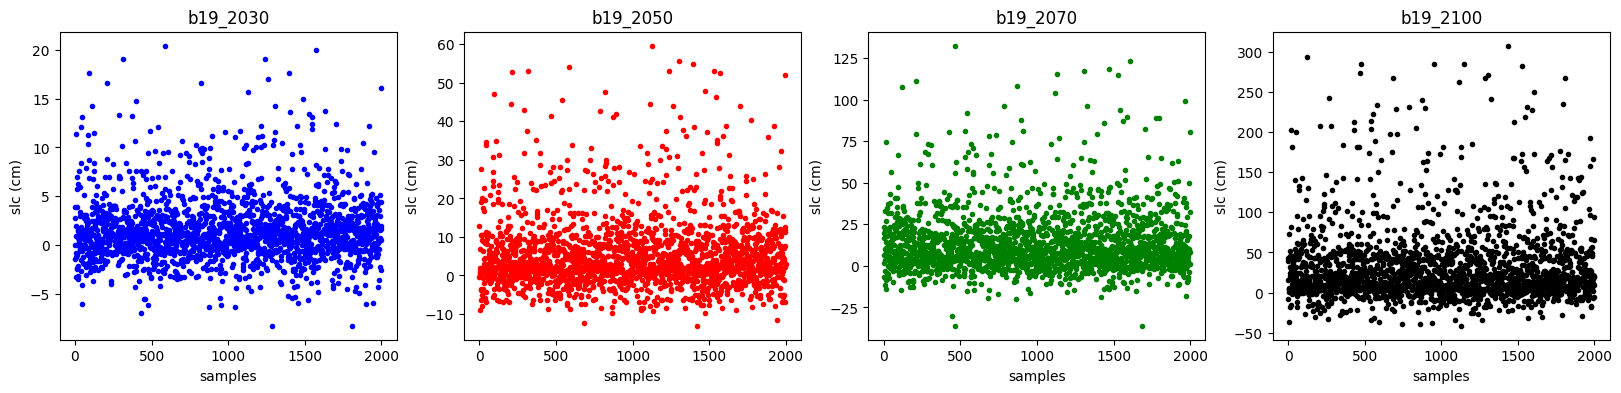

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
var = 'b19'; T1=2030; T2=2050; T3=2070; T4=2100  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');
ax[3].plot(eval(f'{var}_{T4}'), color='k', marker='.', linestyle='none'); ax[3].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T4}');

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    PLOT PDF's for </span> 
<span style="color: red;"> 2030, 2050, 2070   <b>VS</b>   2100 </span>

<span style="font-family: 'Times New Roman'; font-size: 16pt; color: black;"> Larmip AIS </span>

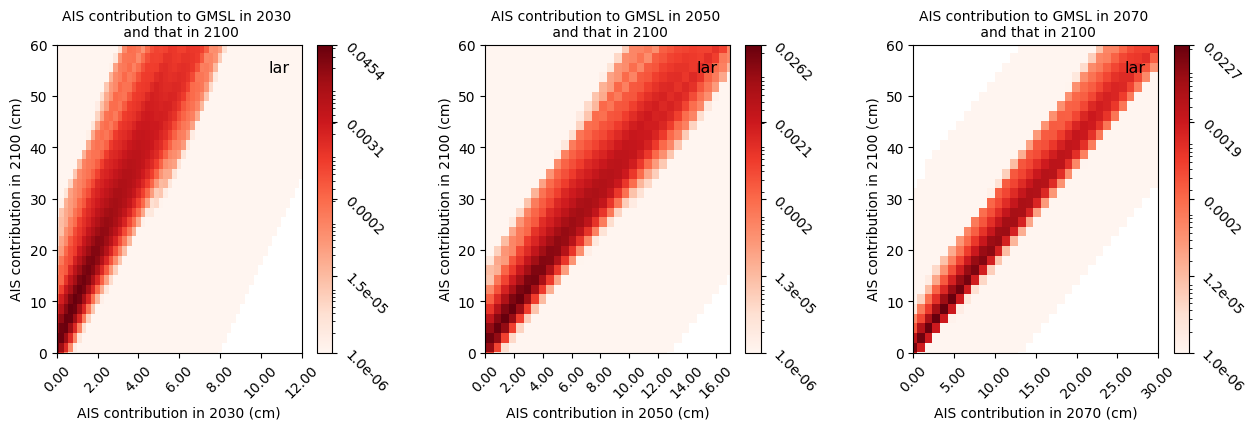

In [10]:
axis_limits = {
    0: {'xlim': (0, 12, 2), 'ylim': (0, 60, 10)},
    1: {'xlim': (0, 17, 2), 'ylim': (0, 60, 10)},
    2: {'xlim': (0, 30, 5), 'ylim': (0, 60, 10)}
}
fn.plot_1file('lar',lar_2030,lar_2050, lar_2070, lar_2100, 2030,2050,2070,2100,
             None, None, None, None, 100, 1e-6, 'Reds', 5,
               'AIS',10, axis_limits)

In [11]:
# OLD code
# fn.plot_1file('lar',lar_2030,lar_2050, lar_2070, lar_2100, 2030,2050,2070,2100,
#              None, None, None, None, 100, 1e-6, 'Reds', 5,
#                 None, None, 10, 0, 60, 10, 'AIS',10)
    

# # None, None, 10, -20, 180, 40, 'AIS',10)
# # -20, 100, 10, -20, 180, 40, 'AIS',10

<span style="font-family: 'Times New Roman'; font-size: 16pt; color: black;"> Bamber 19 AIS </span>

In [12]:
# fn.plot_1file('b19',b19_2030,b19_2050, b19_2070, b19_2100, 2030,2050,2070,2100,
#              None, None, None, None, 100, 1e-6, 'Blues', 5,
#                 None, None, 10, 0, 60, 10, 'AIS',8) 
# # None, None, 10, -50, 350, 50, 'AIS',8)
# # -60, 200, 20, -50, 350, 50, 'AIS',10)

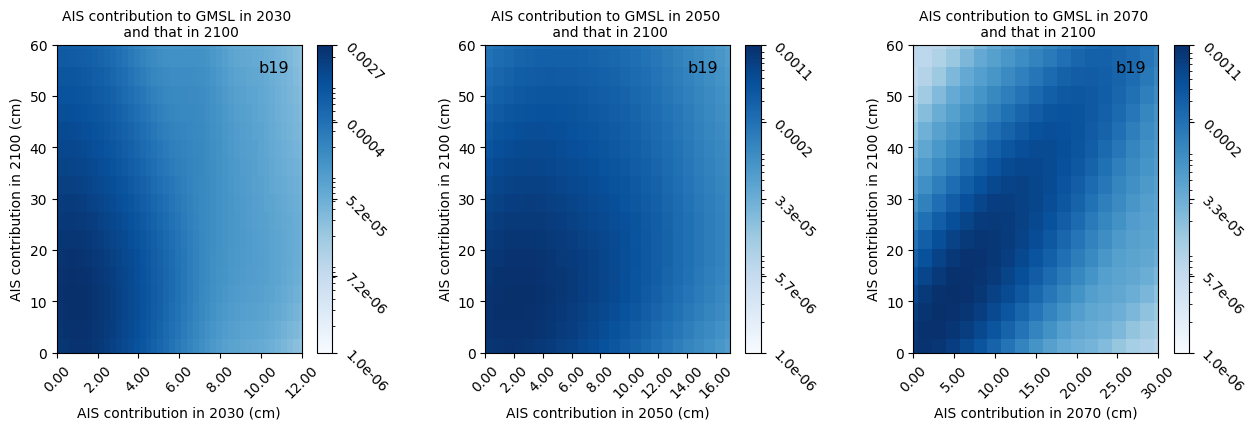

In [13]:
axis_limits = {
    0: {'xlim': (0, 12, 2), 'ylim': (0, 60, 10)},
    1: {'xlim': (0, 17, 2), 'ylim': (0, 60, 10)},
    2: {'xlim': (0, 30, 5), 'ylim': (0, 60, 10)}
}
fn.plot_1file('b19',b19_2030,b19_2050, b19_2070, b19_2100, 2030,2050,2070,2100,
             None, None, None, None, 100, 1e-6, 'Blues', 5,
               'AIS',10, axis_limits)

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">